# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Dava Pasha
- Email: davapasha16@gmail.com
- Id Dicoding: mdavap

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn import preprocessing   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

### Menyiapkan data yang akan digunakan

## Data Understanding

In [3]:
data = pd.read_csv('./data/employee_data.csv', encoding='windows-1252')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [8]:
employee_length = data.EmployeeId.nunique()
print(f'Total employee: {employee_length}')

Total employee: 1470


Text(0.5, 1.0, 'Overall Attrition Rate')

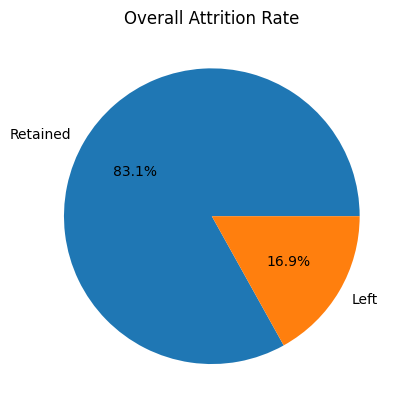

In [ ]:
attrition_counts = data['Attrition'].value_counts()
plt.pie(attrition_counts, labels=['Retained', 'Left'], autopct='%1.1f%%')
plt.title('Overall Attrition Rate')

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

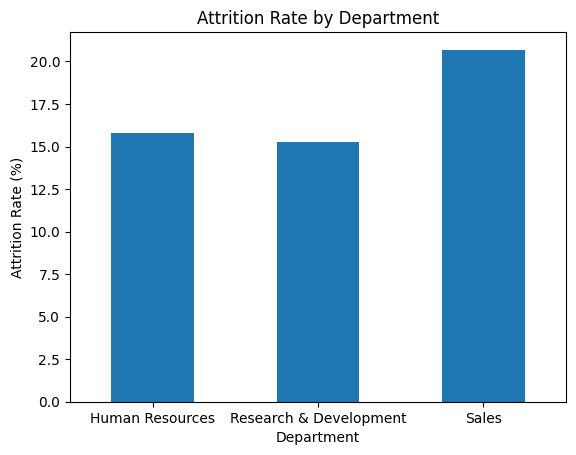

In [39]:
dept_attrition = data.groupby('Department')['Attrition'].mean() * 100
dept_attrition.plot(kind='bar')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Age Distribution by Attrition')

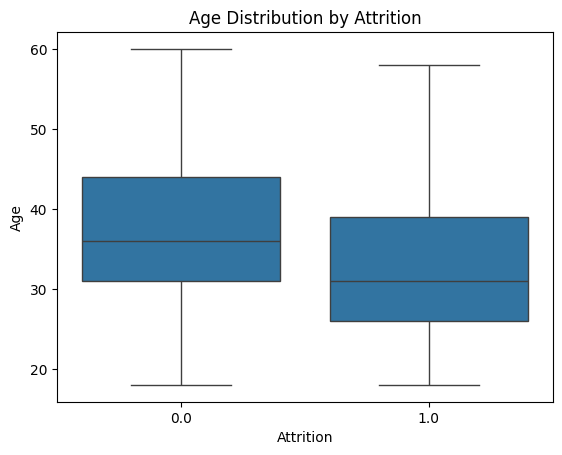

In [40]:
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age Distribution by Attrition')

Text(0.5, 1.0, 'Monthly Income Distribution by Attrition')

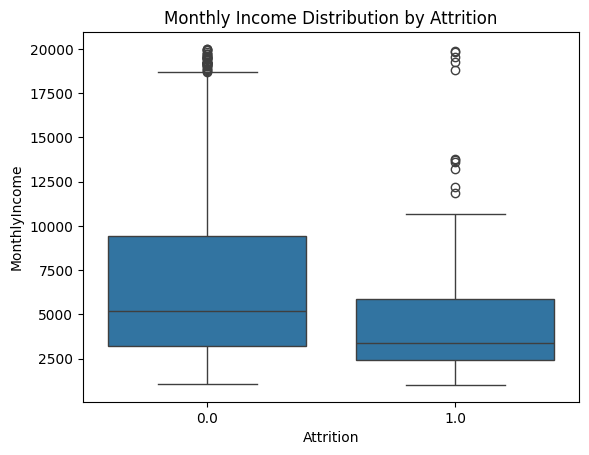

In [41]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income Distribution by Attrition')

In [42]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

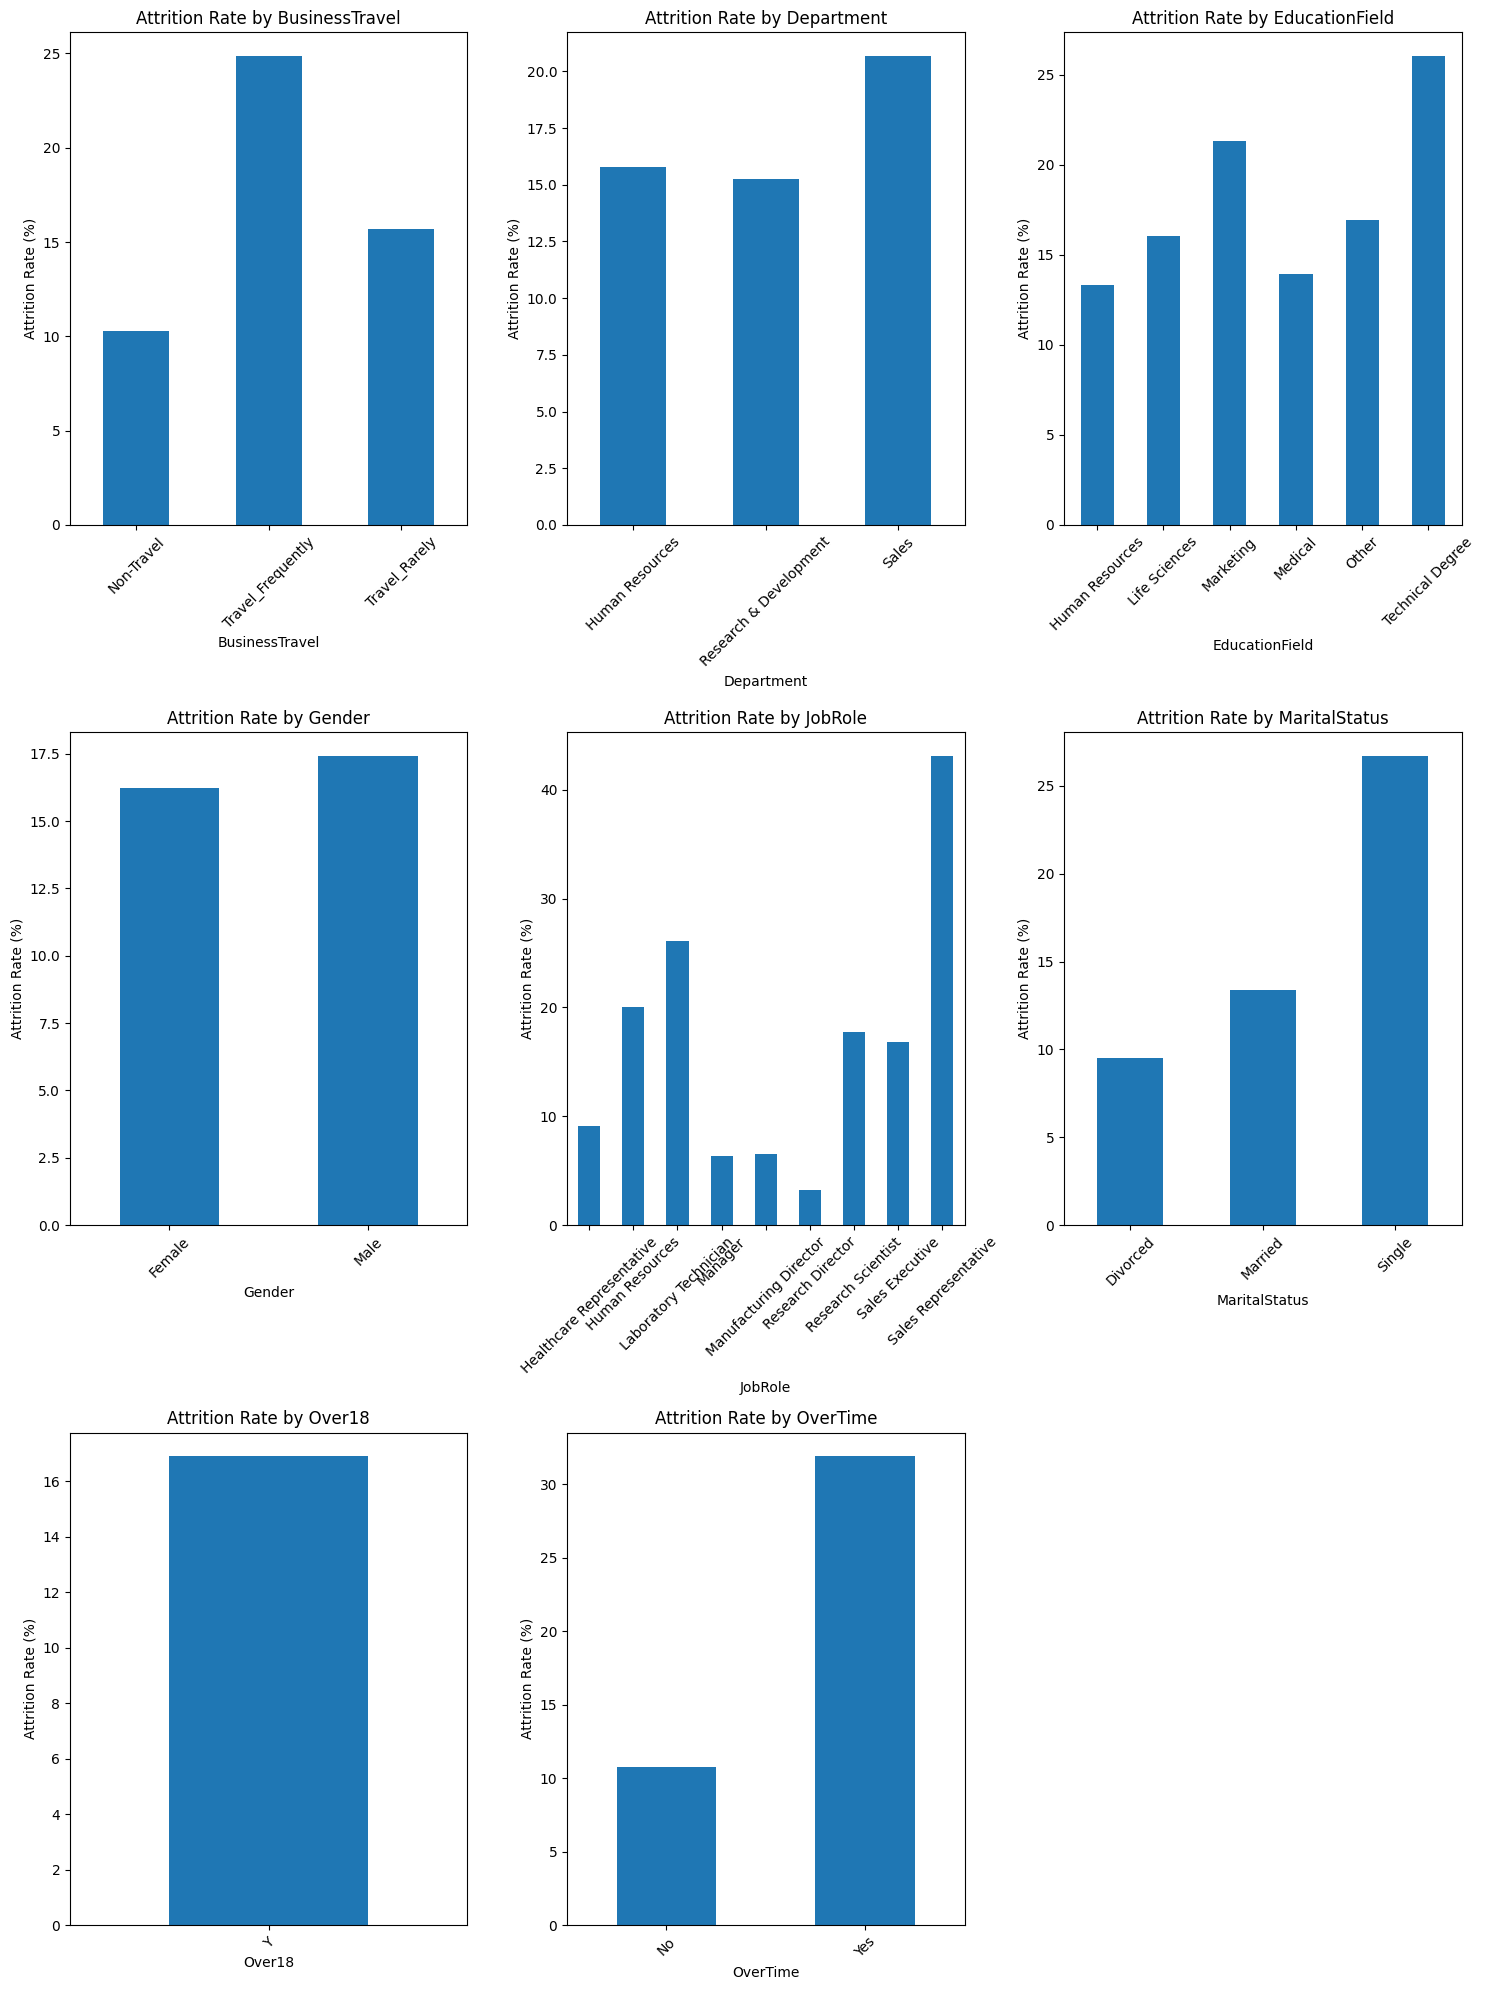

In [78]:
plt.figure(figsize=(15, 20))
    
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    attrition_by_factor = data.groupby(col)['Attrition'].mean() * 100
    attrition_by_factor.plot(kind='bar')
    plt.title(f'Attrition Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition Rate (%)')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [61]:
numerical_columns = data.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

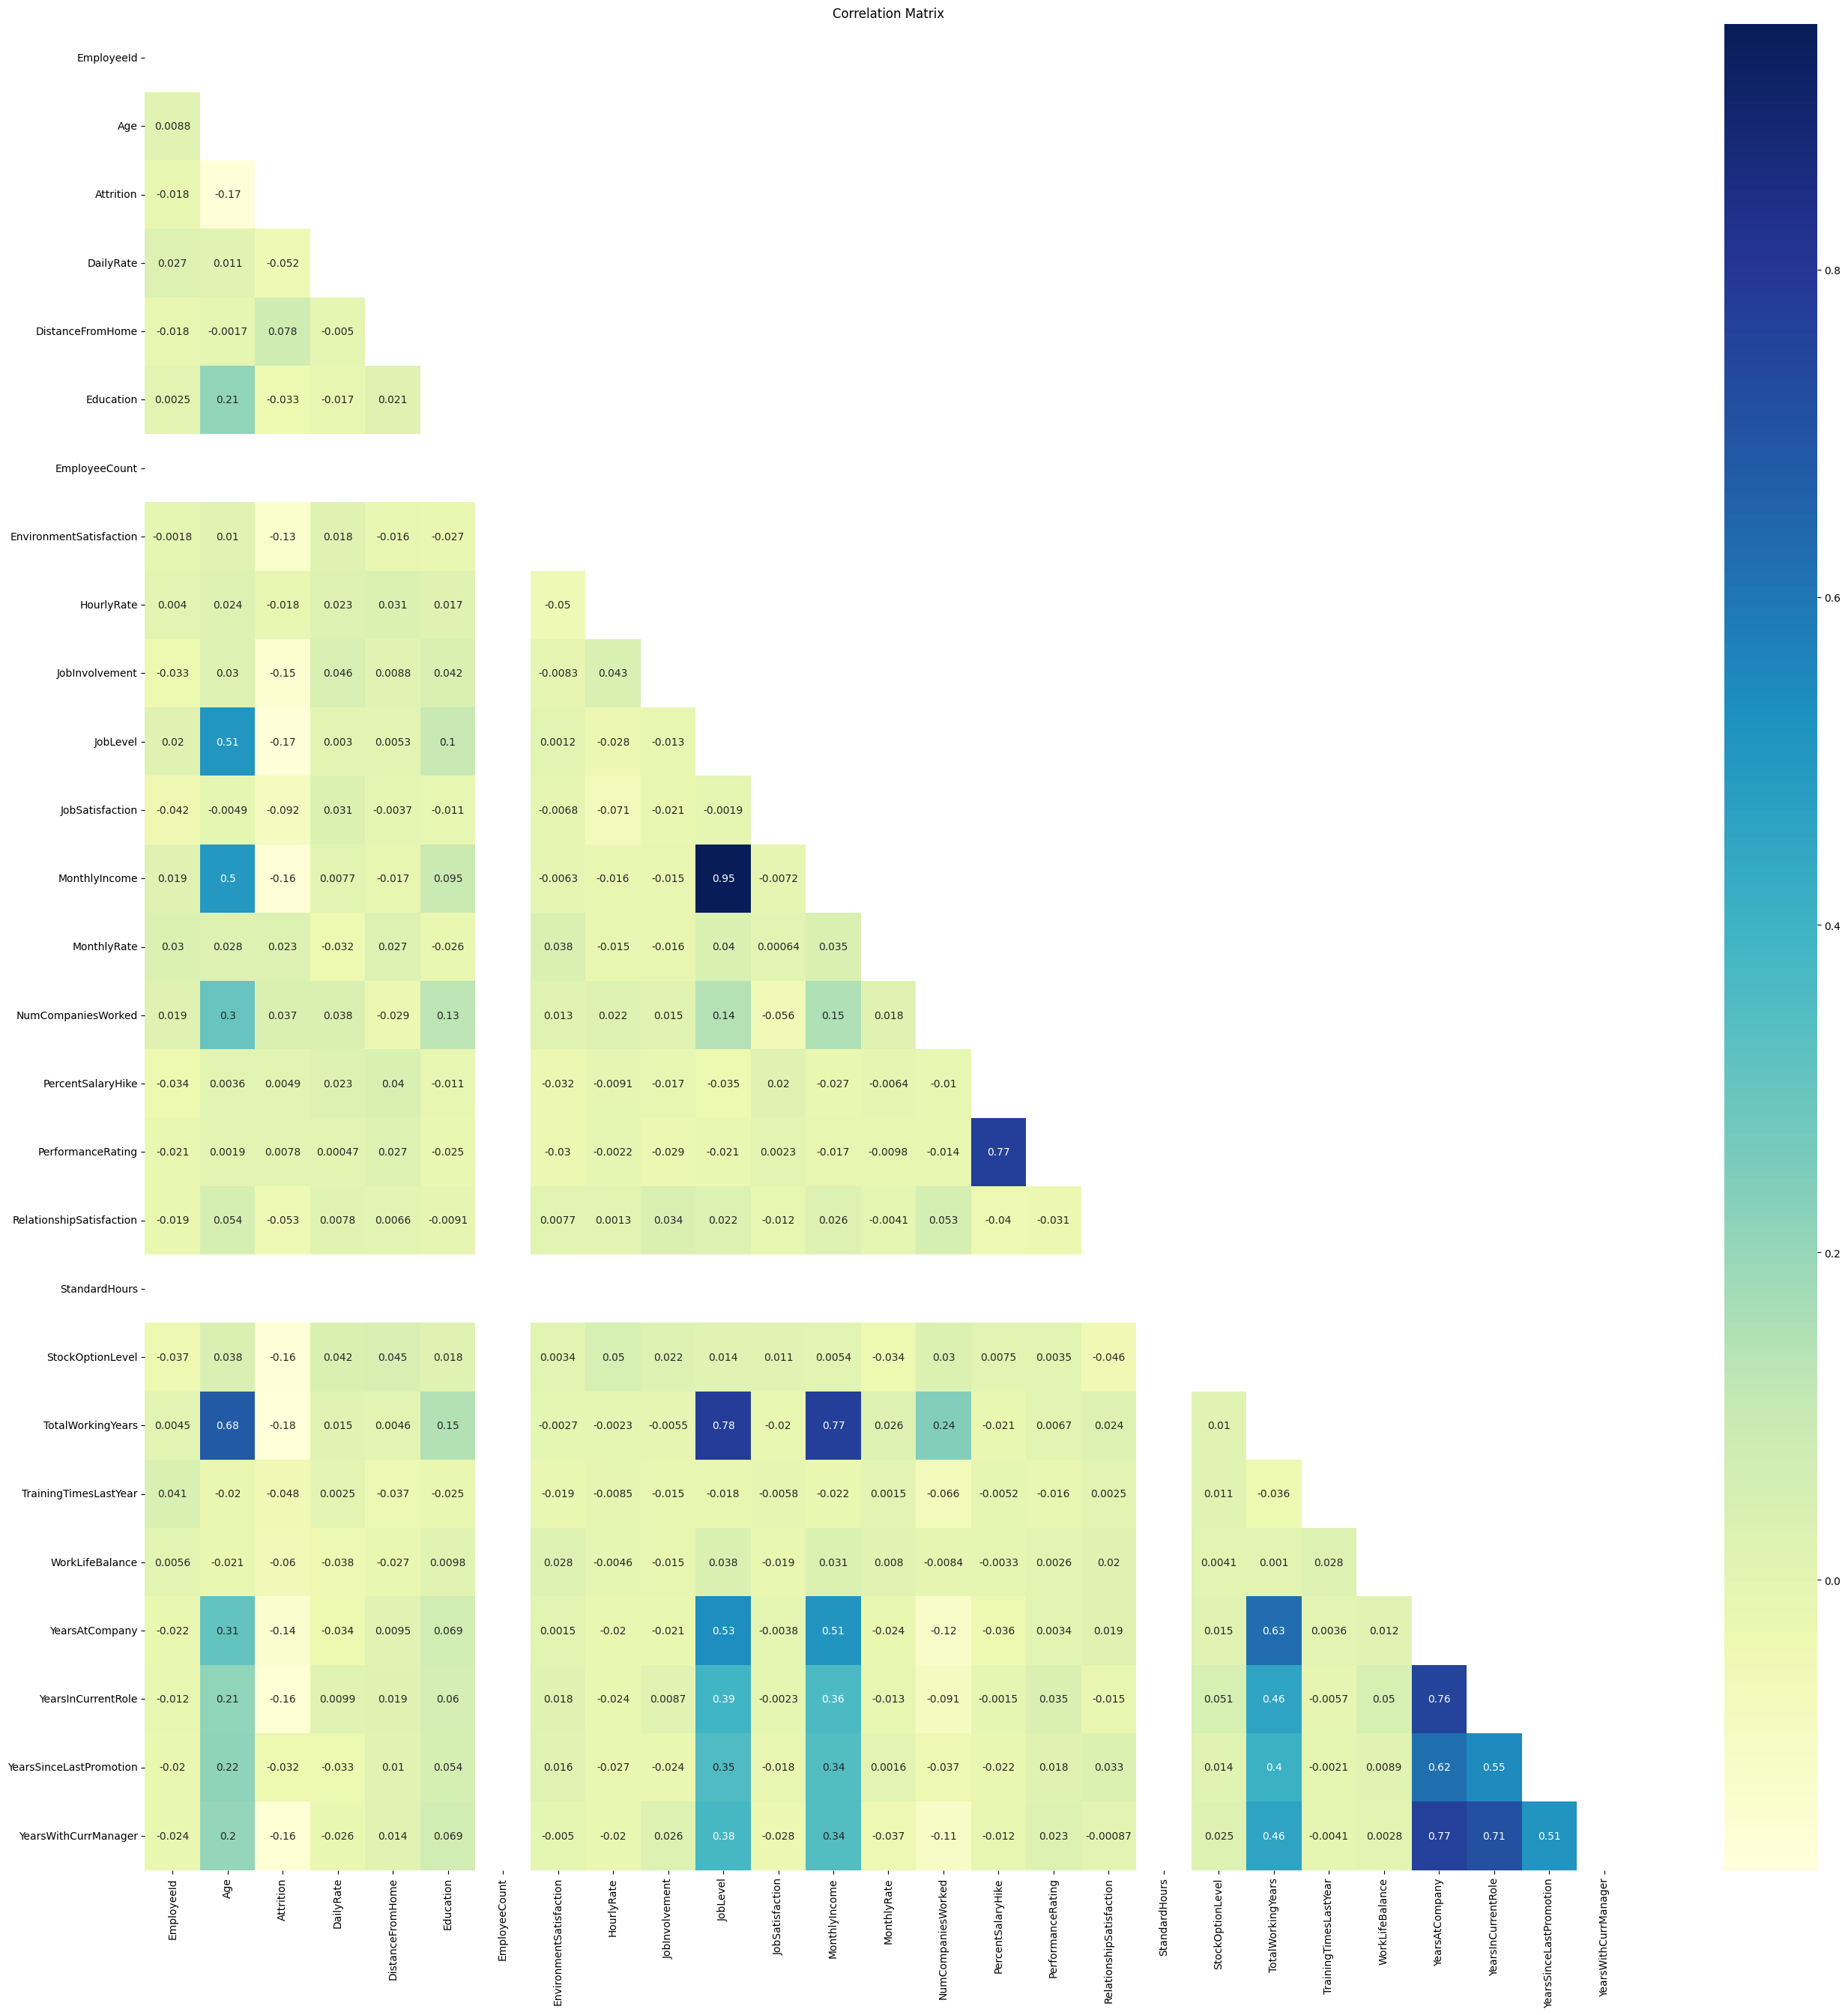

In [69]:
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize = (32,32))
ax = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

In [79]:
print("Summary Statistics for Numerical Variables by Attrition:")
print(data.groupby('Attrition').agg({
    'Age': ['mean', 'std'],
    'MonthlyIncome': ['mean', 'std'],
    'YearsAtCompany': ['mean', 'std'],
    'DistanceFromHome': ['mean', 'std']
}))

Summary Statistics for Numerical Variables by Attrition:
                 Age           MonthlyIncome              YearsAtCompany  \
                mean       std          mean          std           mean   
Attrition                                                                  
0.0        37.786121  9.156684   6982.928328  4947.913587       7.447099   
1.0        33.469274  9.834753   4872.938547  3807.243146       5.189944   

                    DistanceFromHome            
                std             mean       std  
Attrition                                       
0.0        6.252953         8.695108  7.909964  
1.0        5.997913        10.368715  8.541263  


## Data Preparation / Preprocessing

In [4]:
data.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
data['Attrition'].fillna(0, inplace=True)

In [6]:
data.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data[data['Attrition'] == 1].value_counts().sum()

np.int64(179)

In [8]:
data[data['Attrition'] == 0].value_counts().sum()

np.int64(1291)

In [9]:
# Encoding
non_number_col = data.select_dtypes(exclude=[np.number]).columns.tolist()
encoders = {col: preprocessing.LabelEncoder() for col in non_number_col}

for col in non_number_col:
    data[col] = encoders[col].fit_transform(data[col])
    print(f'{col} Encoded!')

BusinessTravel Encoded!
Department Encoded!
EducationField Encoded!
Gender Encoded!
JobRole Encoded!
MaritalStatus Encoded!
Over18 Encoded!
OverTime Encoded!


In [10]:
data.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,1,1444,0,1,4,4,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,2,1141,1,11,2,3,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,0.0,2,1194,1,2,4,3,1,...,2,80,3,20,2,3,5,3,0,2


In [11]:
X = data.drop(['Attrition', 'EmployeeId'], axis=1)
y = data['Attrition']

# Split the Dataset into Train and Test with test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Modeling

In [12]:
def GetModelPerfomance(model, test_result):
    print('-'*20, model, '-'*20)
    print(f'Accuracy Score: {accuracy_score(y_test, test_result)}')
    print(f'Recall Score: {recall_score(y_test, test_result)}')
    print(f'Precision Score: {precision_score(y_test, test_result)}')

    matrix = confusion_matrix(y_test, test_result)
    
    print(f'True Positive: {matrix[0][0]}')
    print(f'False Positive: {matrix[0][1]}')

    print(f'False Negative: {matrix[1][0]}')
    print(f'True Negative: {matrix[1][1]}')

    print('-' * (40 + len(model) + 2))

In [13]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_test_pred_decision = decision_tree.predict(X_test)

In [14]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)

y_test_pred_random_forest = random_forest.predict(X_test)

In [15]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_test_pred_svc = linear_svc.predict(X_test)

## Evaluation

In [16]:
GetModelPerfomance('Decision Tree', y_test_pred_decision)
GetModelPerfomance('Random Forest', y_test_pred_random_forest)
GetModelPerfomance('Linear SVC', y_test_pred_svc)

-------------------- Decision Tree --------------------
Accuracy Score: 0.8537414965986394
Recall Score: 0.3939393939393939
Precision Score: 0.3611111111111111
True Positive: 238
False Positive: 23
False Negative: 20
True Negative: 13
-------------------------------------------------------
-------------------- Random Forest --------------------
Accuracy Score: 0.8877551020408163
Recall Score: 0.09090909090909091
Precision Score: 0.5
True Positive: 258
False Positive: 3
False Negative: 30
True Negative: 3
-------------------------------------------------------
-------------------- Linear SVC --------------------
Accuracy Score: 0.8945578231292517
Recall Score: 0.06060606060606061
Precision Score: 1.0
True Positive: 261
False Positive: 0
False Negative: 31
True Negative: 2
----------------------------------------------------


## Save best model

In [20]:
model_file = open('model.bin', 'ab')
pickle.dump(linear_svc, model_file)                    
model_file.close()
print('Model has been saved to model.bin')

Model has been saved to model.bin
